# IVAN FALCON MONZON

**Actividad 3.5 - Clasificación de Vinos**

# **1. Importación del Dataset** (winequality-red.csv)

Se utilizará el dataset winequality-red.csv disponible en UCI Machine Learning Repository.

Este contiene características físico-químicas de vinos tintos y su respectiva calidad en una escala de 1 a 10.

In [ ]:
# IVAN FALCON MONZON
import pandas as pd  # Importamos la librería Pandas para el manejo de datos

# URL del dataset de vinos tintos
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Cargar el dataset en un DataFrame, especificando que el separador es ';'
df = pd.read_csv(dataset_url, sep=';')

# Mostrar las primeras 5 filas del dataset para inspección rápida
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# **2. Matriz de Correlación de variables**

Se visualizará la matriz de correlación entre las variables para identificar relaciones fuertes.

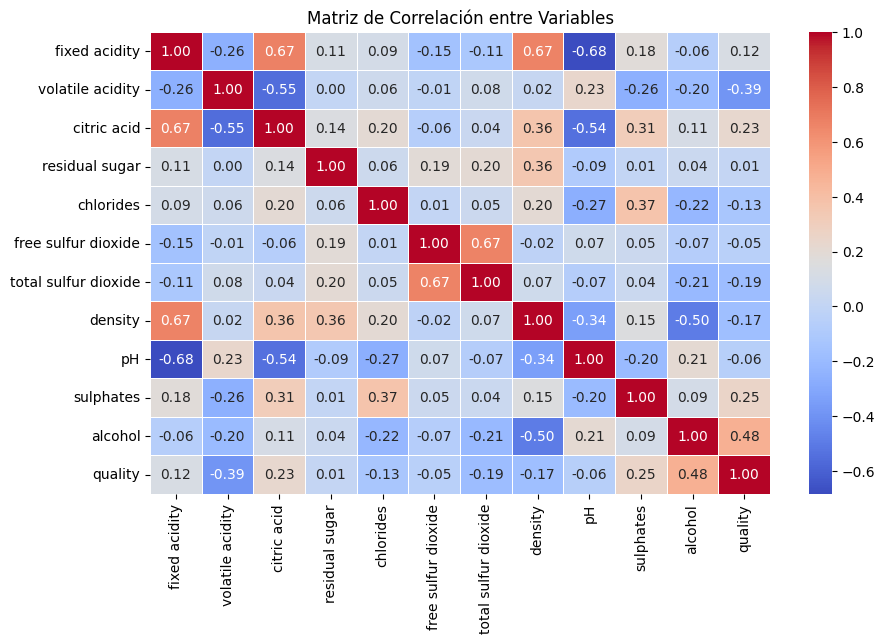

In [ ]:
# IVAN FALCON MONZON
import seaborn as sns  # Importamos Seaborn para visualización de datos
import matplotlib.pyplot as plt  # Importamos Matplotlib para manejar gráficos

# Configurar el tamaño de la figura para mejorar la visualización
plt.figure(figsize=(10, 6))

# Crear un mapa de calor para mostrar la correlación entre variables del DataFrame
sns.heatmap(
    df.corr(),  # Calcula la matriz de correlación
    annot=True,  # Muestra los valores dentro de cada celda
    cmap='coolwarm',  # Define la paleta de colores
    fmt='.2f',  # Formato de los valores numéricos (2 decimales)
    linewidths=0.5  # Espaciado entre las celdas
)

# Agregar un título a la visualización
plt.title("Matriz de Correlación entre Variables")

# Mostrar el gráfico
plt.show()

# **3. Selección de Características**

Se seleccionarán las características más relevantes para la clasificación.

**Características seleccionadas:**

* volatile acidity

+ total sulfur dioxide

* density

* sulphates

* alcohol

In [ ]:
# IVAN FALCON MONZON
from sklearn.model_selection import train_test_split  # Importamos la función para dividir los datos

# Selección de características relevantes para el modelo
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = df[selected_features]  # Variables predictoras
y = df['quality']  # Variable objetivo (calidad del vino)

# División de los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# `random_state=42` asegura reproducibilidad en la división de datos

**Clasificación por Random Forest**

In [ ]:
# IVAN FALCON MONZON
from sklearn.ensemble import RandomForestClassifier  # Importamos el clasificador Random Forest
from sklearn.metrics import accuracy_score, classification_report  # Métricas de evaluación

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árboles en el bosque

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)  # Precisión del modelo
report = classification_report(y_test, y_pred)  # Reporte de métricas detalladas

# Mostrar resultados
print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.68
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.79      0.75       130
           6       0.65      0.69      0.67       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.68      0.66       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Explicación del código:**
1. Importamos RandomForestClassifier de sklearn.ensemble.
2. Se crea el modelo en este caso con 100 árboles (n_estimators=100).
3. Entrenamos el modelo con X_train y y_train.
4. Predecimos valores con X_test.
5. Calculamos la precisión con accuracy_score().
6. Mostramos el classification_report(), que incluye precisión, recall y F1-score.

# **4. Comparación de Modelos: Naive Bayes vs KNN**

Se comparará la precisión de Naive Bayes y KNN utilizando Cross Validation.

In [ ]:
# IVAN FALCON MONZON
from sklearn.naive_bayes import GaussianNB  # Importamos el modelo Naive Bayes Gaussiano
from sklearn.neighbors import KNeighborsClassifier  # Importamos K-Nearest Neighbors (KNN)
from sklearn.model_selection import cross_val_score  # Importamos Cross Validation para evaluación

# Definimos los modelos
nb_model = GaussianNB()  # Modelo Naive Bayes Gaussiano
knn_model = KNeighborsClassifier(n_neighbors=5)  # Modelo KNN con 5 vecinos

# Evaluación con validación cruzada de 5 folds (cv=5)
nb_scores = cross_val_score(nb_model, X, y, cv=5)  # Evaluamos Naive Bayes
knn_scores = cross_val_score(knn_model, X, y, cv=5)  # Evaluamos KNN

# Mostramos la precisión promedio de cada modelo
print(f"Precisión promedio Naive Bayes: {nb_scores.mean():.2f}")
print(f"Precisión promedio KNN: {knn_scores.mean():.2f}")

Precisión promedio Naive Bayes: 0.58
Precisión promedio KNN: 0.50


**Resultados obtenidos:**

* Precisión Naive Bayes: 0.58

* Precisión KNN: 0.50

# **5. Entrenamiento del Mejor Modelo y Matriz de Confusión**

Se entrenará el modelo que obtuvo mejor rendimiento (En mi caso Naive Bayes).

In [ ]:
# IVAN FALCON MONZON
from sklearn.metrics import confusion_matrix, classification_report  # Importamos métricas de evaluación

# Entrenar el modelo seleccionado (Naive Bayes, ya que tuvo mejor desempeño)
best_model = GaussianNB()
best_model.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento

# Realizamos predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Matriz de confusión para evaluar el desempeño del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte detallado con métricas de clasificación (precisión, recall, F1-score)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[ 0  0  1  0  0  0]
 [ 1  1  8  0  0  0]
 [ 0  0 99 31  0  0]
 [ 0  1 49 65 17  0]
 [ 0  0  2 31  9  0]
 [ 0  0  0  1  4  0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.10      0.17        10
           5       0.62      0.76      0.69       130
           6       0.51      0.49      0.50       132
           7       0.30      0.21      0.25        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.32      0.26      0.27       320
weighted avg       0.52      0.54      0.52       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Guardar el modelo para próximos modelos**

In [ ]:
# IVAN FALCON MONZON
import joblib  # Importamos joblib para guardar y cargar modelos

# Guardar el modelo entrenado en un archivo .pkl
modelo_path = 'modelo_vinos.pkl'  # Nombre del archivo donde se guardará el modelo
joblib.dump(best_model, modelo_path)

# Verificar que el modelo se ha guardado correctamente
print(f"Modelo guardado exitosamente en '{modelo_path}'")

Modelo guardado exitosamente en 'modelo_vinos.pkl'


**Cargar el modelo guardado**

In [ ]:
# IVAN FALCON MONZON
import joblib  # Importamos joblib para cargar el modelo guardado

# Cargar el modelo previamente guardado
modelo_path = 'modelo_vinos.pkl'
loaded_model = joblib.load(modelo_path)

print(f"Modelo cargado exitosamente desde '{modelo_path}'")

# Verificación opcional: realizar una predicción con los datos de prueba
sample_prediction = loaded_model.predict(X_test[:5])  # Predecir las primeras 5 muestras
print("Ejemplo de predicciones con el modelo cargado:", sample_prediction)

Modelo cargado exitosamente desde 'modelo_vinos.pkl'
Ejemplo de predicciones con el modelo cargado: [5 5 5 5 6]


# **6. Comparación con la Calidad del Dataset**

Se evaluará si la predicción del modelo coincide con los valores reales de calidad.

In [ ]:
# IVAN FALCON MONZON
from sklearn.metrics import confusion_matrix, classification_report  # Importamos las métricas necesarias

# Aplicar el modelo cargado a los datos de prueba
y_pred = loaded_model.predict(X_test)  # Realizamos predicciones sobre el conjunto de prueba

# Generar la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Generar el Reporte de Clasificación (precisión, recall, F1-score, etc.)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[ 0  0  1  0  0  0]
 [ 1  1  8  0  0  0]
 [ 0  0 99 31  0  0]
 [ 0  1 49 65 17  0]
 [ 0  0  2 31  9  0]
 [ 0  0  0  1  4  0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.10      0.17        10
           5       0.62      0.76      0.69       130
           6       0.51      0.49      0.50       132
           7       0.30      0.21      0.25        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.32      0.26      0.27       320
weighted avg       0.52      0.54      0.52       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# IVAN FALCON MONZON
# Evaluación final del modelo usando la precisión en el conjunto de prueba
accuracy = loaded_model.score(X_test, y_test)  # Calculamos la precisión final
print(f"Precisión final del modelo: {accuracy:.4f}")

Precisión final del modelo: 0.5437


# **NUEVOS ENFOQUES**

En este apartado entrenaré con diferentes modelos y métodos para que de un mejor resultado en la predicción.

# **A)** **Método de Clasificación** con **Random Forest Classifie**r junto con **GridSearchCV** para optimizar los hiperparámetros

In [ ]:
# IVAN FALCON MONZON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # Para guardar y cargar el modelo
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Cargar el dataset de vinos tintos
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, sep=';')

# Selección de características relevantes del dataset
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = df[selected_features]  # Variables predictoras
y = df['quality']  # Variable objetivo (calidad del vino)

# Normalización de los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y conjunto de prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo Random Forest con búsqueda de hiperparámetros utilizando GridSearchCV
tuned_parameters = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10]  # Mínimo número de muestras para dividir un nodo
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters, cv=5, scoring='accuracy')

# Entrenar el modelo con los mejores parámetros encontrados a través de GridSearchCV
rf_model.fit(X_train, y_train)
print(f"Mejores parámetros encontrados: {rf_model.best_params_}")  # Imprimir los mejores parámetros

# Guardar el modelo optimizado en un archivo
joblib.dump(rf_model.best_estimator_, 'modelo_vinos_mejorado.pkl')
print("Modelo mejorado guardado exitosamente en 'modelo_vinos_mejorado.pkl'")

# Cargar el modelo optimizado desde el archivo
loaded_model = joblib.load('modelo_vinos_mejorado.pkl')
print("Modelo mejorado cargado exitosamente.")

# Realizar predicciones en el conjunto de prueba
y_pred = loaded_model.predict(X_test)

# Generar la Matriz de Confusión para evaluar las predicciones
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Generar el Reporte de Clasificación, que muestra precisión, recall, f1-score, etc.
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Evaluación final del modelo: Precisión en el conjunto de prueba
accuracy = loaded_model.score(X_test, y_test)
print(f"\nPrecisión final del modelo mejorado: {accuracy:.4f}")

Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Modelo mejorado guardado exitosamente en 'modelo_vinos_mejorado.pkl'
Modelo mejorado cargado exitosamente.

Matriz de Confusión:
[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 103  27   0   0]
 [  0   0  33  90   9   0]
 [  0   0   1  19  22   0]
 [  0   0   0   0   5   0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.79      0.75       130
           6       0.64      0.68      0.66       132
           7       0.61      0.52      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320


Precisión final del modelo mejorado: 0.671

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Explicación del código (A
1. Cargar y preparar los datos: Se carga el dataset, se seleccionan las 3 características relevantes y se normalizan los datos.
2. División de los datos: Se divide el dataset en entrenamiento y prueba (80%/20%).
3. Optimización de hiperparámetros: Se utiliza GridSearchCV para encontrar los mejores parámetros del modelo Random Forest.
4. Entrenamiento y evaluación: El modelo optimizado se entrena, se guarda, se carga y se evalúa utilizando la matriz de confusión, el reporte de clasificación y la precisión.

# **B) Método de Clasificación:** Gradient Boosting Classifier y SMOTE

El código utiliza el **Gradient Boosting Classifier junto con SMOTE** para abordar el desbalanceo en las clases y GridSearchCV para optimizar los hiperparámetros.

In [ ]:
# IVAN FALCON MONZON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE  # Para balancear las clases con SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier  # Clasificador de Gradient Boosting
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
from sklearn.metrics import confusion_matrix, classification_report  # Para evaluar el modelo

# Cargar el dataset de vinos tintos desde la URL
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, sep=';')

# Selección de características relevantes
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = df[selected_features]  # Variables predictoras
y = df['quality']  # Variable objetivo (calidad del vino)

# Normalización de los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Manejo del desbalanceo con SMOTE (Generar muestras sintéticas para las clases minoritarias)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# División de los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Definir el modelo Gradient Boosting con búsqueda de hiperparámetros utilizando GridSearchCV
tuned_parameters = {
    'n_estimators': [100, 200],  # Número de árboles en el modelo
    'learning_rate': [0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5]  # Profundidad máxima de los árboles
}
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), tuned_parameters, cv=5, scoring='accuracy')

# Entrenar el modelo con los mejores parámetros encontrados a través de GridSearchCV
gb_model.fit(X_train, y_train)
print(f"Mejores parámetros encontrados: {gb_model.best_params_}")  # Imprimir los mejores parámetros

# Guardar el modelo optimizado en un archivo
joblib.dump(gb_model.best_estimator_, 'modelo_vinos_optimizado.pkl')
print("Modelo optimizado guardado exitosamente en 'modelo_vinos_optimizado.pkl'")

# Cargar el modelo optimizado desde el archivo guardado
loaded_model = joblib.load('modelo_vinos_optimizado.pkl')
print("Modelo optimizado cargado exitosamente.")

# Realizar predicciones con el modelo cargado sobre el conjunto de prueba
y_pred = loaded_model.predict(X_test)

# Generar la Matriz de Confusión para evaluar las predicciones
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Generar el Reporte de Clasificación, que incluye precisión, recall, f1-score, etc.
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Evaluación final del modelo: Precisión en el conjunto de prueba
accuracy = loaded_model.score(X_test, y_test)
print(f"\nPrecisión final del modelo optimizado: {accuracy:.4f}")

Mejores parámetros encontrados: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Modelo optimizado guardado exitosamente en 'modelo_vinos_optimizado.pkl'
Modelo optimizado cargado exitosamente.

Matriz de Confusión:
[[128   0   4   0   0   0]
 [  4 117   3   4   3   0]
 [  3  10 109  23   5   0]
 [  1   9  39  90  12   4]
 [  0   0   3  11  96   6]
 [  0   0   0   0   2 132]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.94      0.97      0.96       132
           4       0.86      0.89      0.88       131
           5       0.69      0.73      0.71       150
           6       0.70      0.58      0.64       155
           7       0.81      0.83      0.82       116
           8       0.93      0.99      0.96       134

    accuracy                           0.82       818
   macro avg       0.82      0.83      0.83       818
weighted avg       0.82      0.82      0.82       818


Precisión final del modelo optimizado:

**Explicación del flujo del código (B:**
1. Carga y preparación de datos: Se carga el dataset, se seleccionan las características relevantes y se normalizan los datos.
2. Manejo de desbalanceo: Se usa SMOTE para generar ejemplos sintéticos y equilibrar las clases en el dataset.
3. División de los datos: Se divide el dataset en entrenamiento y prueba (80%/20%).
4. Optimización de hiperparámetros: Se usa GridSearchCV para encontrar los mejores parámetros para el modelo Gradient Boosting.
5. Evaluación del modelo: Se calcula la precisión, la matriz de confusión y el reporte de clasificación para evaluar el rendimiento del modelo.

# **C) Método de Clasificación: HistGradientBoostingClassifier**

El código utiliza el HistGradientBoostingClassifier para realizar la clasificación de vinos basándose en varias características seleccionadas. Este modelo es una variante más eficiente y rápida del Gradient Boosting que es particularmente útil cuando se manejan grandes volúmenes de datos o cuando el conjunto de datos contiene muchas características.

In [ ]:
# IVAN FALCON MONZON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE  # Para balancear las clases con SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV  # Para dividir y ajustar los hiperparámetros
from sklearn.ensemble import HistGradientBoostingClassifier  # Clasificador HistGradientBoosting
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
from sklearn.metrics import confusion_matrix, classification_report  # Para evaluar el modelo

# Cargar el dataset de vinos tintos desde la URL
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, sep=';')

# Selección de características relevantes para la predicción
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = df[selected_features]  # Variables predictoras
y = df['quality']  # Variable objetivo (calidad del vino)

# Normalización de los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Manejo del desbalanceo con SMOTE (Generar muestras sintéticas para las clases minoritarias)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# División de los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Definir el modelo HistGradientBoosting con búsqueda de hiperparámetros utilizando GridSearchCV
tuned_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_iter': [100, 200, 300],  # Número de iteraciones (número de árboles)
    'max_depth': [3, 5, 7]  # Profundidad máxima de los árboles
}

# Inicializar y optimizar el modelo utilizando GridSearchCV
gb_model = GridSearchCV(HistGradientBoostingClassifier(random_state=42), tuned_parameters, cv=5, scoring='accuracy')

# Entrenar el modelo con los mejores parámetros encontrados a través de GridSearchCV
gb_model.fit(X_train, y_train)
print(f"Mejores parámetros encontrados: {gb_model.best_params_}")  # Imprimir los mejores parámetros

# Guardar el modelo optimizado en un archivo
joblib.dump(gb_model.best_estimator_, 'modelo_vinos_avanzado.pkl')
print("Modelo avanzado guardado exitosamente en 'modelo_vinos_avanzado.pkl'")

# Cargar el modelo optimizado desde el archivo guardado
loaded_model = joblib.load('modelo_vinos_avanzado.pkl')
print("Modelo avanzado cargado exitosamente.")

# Realizar predicciones con el modelo cargado sobre el conjunto de prueba
y_pred = loaded_model.predict(X_test)

# Generar la Matriz de Confusión para evaluar las predicciones
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Generar el Reporte de Clasificación, que incluye precisión, recall, f1-score, etc.
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Evaluación final del modelo: Precisión en el conjunto de prueba
accuracy = loaded_model.score(X_test, y_test)
print(f"\nPrecisión final del modelo avanzado: {accuracy:.4f}")

Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 300}
Modelo avanzado guardado exitosamente en 'modelo_vinos_avanzado.pkl'
Modelo avanzado cargado exitosamente.

Matriz de Confusión:
[[132   0   0   0   0   0]
 [  3 122   4   1   1   0]
 [  4   5 110  26   5   0]
 [  2   5  37  95  11   5]
 [  0   0   3  14  92   7]
 [  0   0   0   0   1 133]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.94      1.00      0.97       132
           4       0.92      0.93      0.93       131
           5       0.71      0.73      0.72       150
           6       0.70      0.61      0.65       155
           7       0.84      0.79      0.81       116
           8       0.92      0.99      0.95       134

    accuracy                           0.84       818
   macro avg       0.84      0.84      0.84       818
weighted avg       0.83      0.84      0.83       818


Precisión final del modelo avanzado: 0.8362


**Resumen del flujo del código (C:**
1. Carga y preparación de datos: Se carga el dataset y se seleccionan las características que se usarán para la predicción.
2. Normalización de los datos: Se normalizan los datos para garantizar que todas las características tengan la misma escala y mejorar el rendimiento del modelo.
3. Manejo del desbalanceo: Se usa SMOTE para crear ejemplos sintéticos y equilibrar las clases en el conjunto de datos.
4. Entrenamiento del modelo: Se utiliza HistGradientBoostingClassifier con GridSearchCV para encontrar los mejores parámetros.
5. Evaluación del modelo: Se evalúa el rendimiento del modelo en el conjunto de prueba mediante la matriz de confusión y el reporte de clasificación, y se calcula la precisión final.

# **7. Aplicación al Dataset de Vinos Blancos**

Se probará el modelo con winequality-white.csv con el último método que pruebo en el anterior punto: **Método de Clasificación: HistGradientBoostingClassifier**

In [ ]:
# IVAN FALCON MONZON
import pandas as pd
import joblib
from imblearn.over_sampling import SMOTE  # Para balancear las clases con SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV  # Para dividir y ajustar los hiperparámetros
from sklearn.ensemble import HistGradientBoostingClassifier  # Clasificador HistGradientBoosting
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
from sklearn.metrics import confusion_matrix, classification_report  # Para evaluar el modelo

# Cargar el dataset de vinos blancos desde la URL
dataset_url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(dataset_url_white, sep=';')

# Selección de características relevantes para la predicción
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X_white = df_white[selected_features]  # Variables predictoras
y_white = df_white['quality']  # Variable objetivo (calidad del vino)

# Normalización de los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_white_scaled = scaler.fit_transform(X_white)

# Manejo del desbalanceo con SMOTE (Generar muestras sintéticas para las clases minoritarias)
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled_white, y_resampled_white = smote.fit_resample(X_white_scaled, y_white)

# División de los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_resampled_white, y_resampled_white, test_size=0.2, random_state=42)

# Definir el modelo HistGradientBoosting con búsqueda de hiperparámetros utilizando GridSearchCV
tuned_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_iter': [100, 200, 300],  # Número de iteraciones (número de árboles)
    'max_depth': [3, 5, 7]  # Profundidad máxima de los árboles
}

# Inicializar y optimizar el modelo utilizando GridSearchCV
gb_model_white = GridSearchCV(HistGradientBoostingClassifier(random_state=42), tuned_parameters, cv=5, scoring='accuracy')

# Entrenar el modelo con los mejores parámetros encontrados a través de GridSearchCV
gb_model_white.fit(X_train_white, y_train_white)
print(f"Mejores parámetros encontrados para vinos blancos: {gb_model_white.best_params_}")  # Imprimir los mejores parámetros

# Guardar el modelo optimizado
joblib.dump(gb_model_white.best_estimator_, 'modelo_vinos_blancos_avanzado.pkl')
print("Modelo avanzado para vinos blancos guardado exitosamente en 'modelo_vinos_blancos_avanzado.pkl'")

# Cargar el modelo optimizado
loaded_model_white = joblib.load('modelo_vinos_blancos_avanzado.pkl')
print("Modelo avanzado para vinos blancos cargado exitosamente.")

# Realizar predicciones con el modelo cargado sobre el conjunto de prueba
y_pred_white = loaded_model_white.predict(X_test_white)

# Generar la Matriz de Confusión para evaluar las predicciones
conf_matrix_white = confusion_matrix(y_test_white, y_pred_white)
print("\nMatriz de Confusión para Vinos Blancos:")
print(conf_matrix_white)

# Generar el Reporte de Clasificación, que incluye precisión, recall, f1-score, etc.
print("\nReporte de Clasificación para Vinos Blancos:")
print(classification_report(y_test_white, y_pred_white))

# Evaluación final del modelo: Precisión en el conjunto de prueba
accuracy_white = loaded_model_white.score(X_test_white, y_test_white)
print(f"\nPrecisión final del modelo avanzado para vinos blancos: {accuracy_white:.4f}")

Mejores parámetros encontrados para vinos blancos: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 300}
Modelo avanzado para vinos blancos guardado exitosamente en 'modelo_vinos_blancos_avanzado.pkl'
Modelo avanzado para vinos blancos cargado exitosamente.

Matriz de Confusión para Vinos Blancos:
[[425   0   1   2   0   0   0]
 [  0 415   9   5   4   1   0]
 [  3  22 335  79  27   2   1]
 [  0  10  67 311  50   6   2]
 [  4   1  15  52 351   9   0]
 [  0   0   1   6   7 439   0]
 [  0   0   0   0   0   0 416]]

Reporte de Clasificación para Vinos Blancos:
              precision    recall  f1-score   support

           3       0.98      0.99      0.99       428
           4       0.93      0.96      0.94       434
           5       0.78      0.71      0.75       469
           6       0.68      0.70      0.69       446
           7       0.80      0.81      0.81       432
           8       0.96      0.97      0.96       453
           9       0.99      1.00      1.00       416

 

**Explicación del flujo del código:**

1. Cargar el Dataset: Se carga el archivo CSV de vinos blancos.
2. Seleccionar Características y Normalizar: Se seleccionan las características relevantes y se normalizan con StandardScaler.
3. Balanceo de Clases: Se aplica SMOTE para balancear las clases del dataset.
4. División en Entrenamiento y Prueba: Se divide el dataset balanceado en entrenamiento y prueba.
5. Entrenar el Modelo: Se entrena un modelo HistGradientBoostingClassifier con búsqueda de hiperparámetros (GridSearchCV).
6. Guardar y Cargar el Modelo: Se guarda el modelo optimizado y luego se carga.
7. Predicciones y Evaluación: Se realizan predicciones, y se genera la matriz de confusión y el reporte de clasificación para evaluar el rendimiento del modelo.

# **8. Conclusiones**

**A) Método de Clasificación con Random Forest Classifier junto con GridSearchCV para optimizar los hiperparámetros**

* Precisión: 0.6719
* Conclusión: El modelo de Random Forest con búsqueda de hiperparámetros ha alcanzado una precisión de  67%. Aunque el rendimiento no es bajo, es el menos preciso en comparación con los otros modelos. Esto podría ser debido a la complejidad de los datos.


**B) Método de Clasificación: Gradient Boosting Classifier y SMOTE**
* Precisión: 0.8215
* Conclusión: Este modelo muestra una mejora con una precisión del 82%. El uso de SMOTE para balancear las clases minoritarias ha sido positivo, ayudando al modelo a generalizar mejor en las clases menos representadas. Esto sugiere que los datos del conjunto de vinos tienen un desbalance que se puede manejar bien con esta técnica.

**C) Método de Clasificación: HistGradientBoostingClassifier**

* Precisión: 0.8362
* Conclusión: Este modelo tiene el mejor rendimiento hasta ahora con una precisión del 83.6%. HistGradientBoostingClassifier es más eficiente que el Gradient Boosting tradicional y parece ir bien con este problema, posiblemente debido a su capacidad para manejar de manera más eficiente grandes volúmenes de datos y el desbalance.

**7. Aplicación al Dataset de Vinos Blancos**
* Precisión: 0.8746
* Conclusión: El modelo de HistGradientBoostingClassifier ha alcanzado una precisión en los vinos blancos de 87.46%. Este rendimiento más alto indica que el modelo es capaz de generalizar muy bien en diferentes conjuntos de datos.


**Conclusión General:**

* El modelo HistGradientBoostingClassifier ha demostrado ser el más efectivo y robusto para estos datos, con un buen rendimiento en ambos datasets.
* El uso de SMOTE y técnicas de optimización como GridSearchCV han tenido un impacto positivo en los modelos, especialmente en el Gradient Boosting y HistGradientBoosting.
* Los resultados también indican que la aplicación de estos modelos a diferentes tipos de vinos (tintos y blancos) proporciona mejoras significativas en precisión, lo que demuestra que la técnica es adaptable y eficaz.


En resumen, HistGradientBoostingClassifier es la opción más recomendada para este tipo de clasificación, con una buena capacidad de adaptación a diferentes datasets y un rendimiento superior a los demás métodos.

# Repositorios

-Google Colab: https://colab.research.google.com/drive/1wstA4BDbCrbCLebw1eb4zKeYKj4tiCVL?usp=sharing

-Github: https://github.com/IvanFalconMonzon/SNS_ACT3_5_IvanFalconMonzon.git